# Life Expectancy and GDP Starter: Exploratory Data Analysis

# Introduction

This project will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?
+ What is the distribution of GDP?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Python Modules

First import the preliminary modules that will be used in this project:

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

First we take a look at data:

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Let's find out which columns contain null values:

In [3]:
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

We can see that there is no null values in all of our 4 columns.Now, we take a look at summary statistics of our dataset and dimensions of dataframe:

In [4]:
df.shape

(96, 4)

Our dataset has 96 observations and 4 columns.

In [5]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## Explore and Explain Data


First we have to rename "Life expectancy at birth (years)" column's name and change it into single word. LEABY will be a good acronym.

In [4]:
df.rename(columns = {"Life expectancy at birth (years)":"LEABY"}, inplace = True)
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### Research Question 1: Has life expectancy increased over time in the six nations?

In order to answer this question, we have to plot line graph of life expectancy vs. time for all of 6 countries:

<AxesSubplot:xlabel='Year', ylabel='LEABY'>

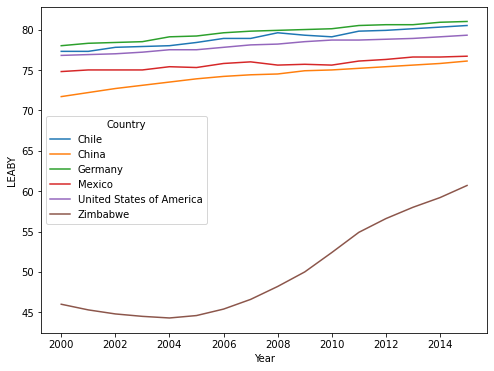

In [9]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.lineplot(x='Year' , y='LEABY', data = df, hue ='Country')

<Figure size 576x432 with 0 Axes>

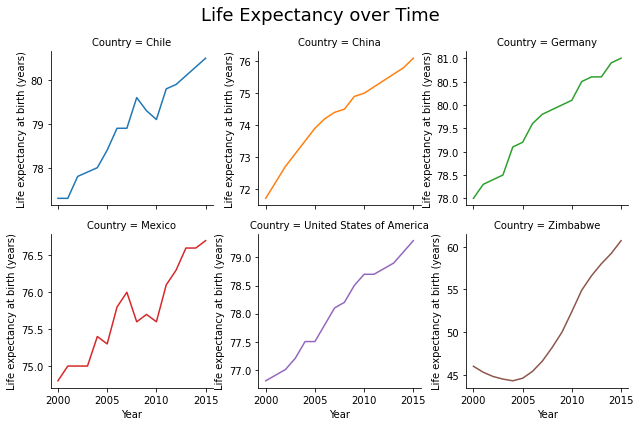

In [22]:
plt.figure(figsize=(8,6))

grid = sns.FacetGrid(data= df, col='Country', hue ='Country', col_wrap=3, sharey = False)
plt.suptitle('Life Expectancy over Time', fontsize=18)

grid.map(sns.lineplot, "Year","LEABY")

grid.set(ylabel = "Life expectancy at birth (years)")

plt.show()

The chart shows that life expectancy has been increased in all of the six countries, but Zimbabwe has experienced the greatest increase after a bit of a drop around 2004.Germany has the highest life expectancy throughout this period.When we plot the life expectancy of all countries with shared y-axis, we can't see the details of charts.But when we plot each country seperately, we can see drops in the life expectancy of Mexico and Chile in the same years(between 2005 and 2010) more obviously.

### Research Question 2: Has GDP increased over time in the six nations?

Like 'Research Question 1' we have to plot line graph of GDP vs. time for all of 6 countries.

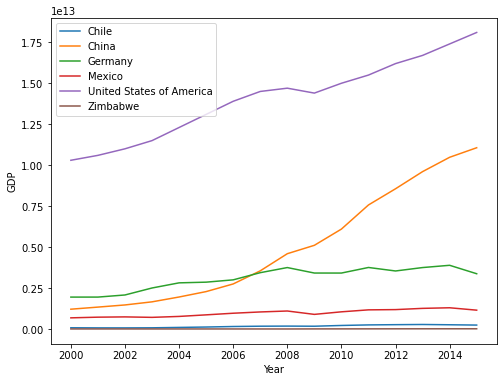

In [94]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.lineplot(x='Year' , y='GDP', data = df, hue ='Country')

plt.legend(loc =2)

<Figure size 576x432 with 0 Axes>

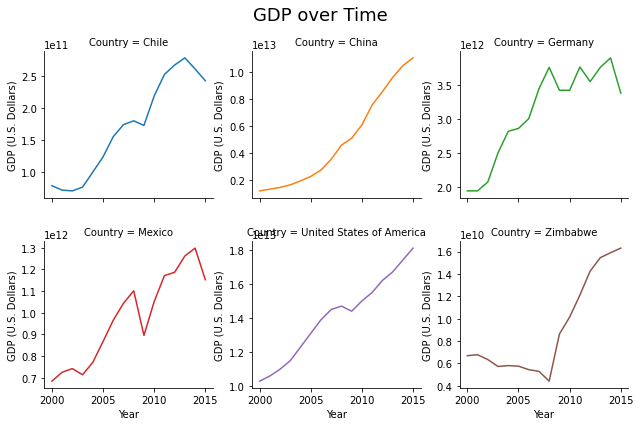

In [23]:
plt.figure(figsize=(8,6))

grid = sns.FacetGrid(data= df, col='Country', hue ='Country', col_wrap=3, sharey = False)
plt.suptitle('GDP over Time', fontsize=18)

grid.map(sns.lineplot, "Year","GDP")

grid.set(ylabel = "GDP (U.S. Dollars)")

grid.fig.subplots_adjust(hspace=0.3)

plt.show()

We can see that in general, the GDP of all six countries increased over this period.When we plot the GDP of all six countries in same plot with shared y-axis, we find that china and United States have seen the greatest increase in Gross domestic product between 2000 and 2015.China's GDP went from less than a two trillion dollars in 2000 to more than 10 trillion dollars(11.06 trillion USD) in 2015.United States' GDP also grew from more than 10 trillion dollars in 2000 to more than 18 trillion dollars in 2015.The rest of the countries did not see increases in this magnitude.

### Research Question 3: Is there a correlation between GDP and life expectancy of a country?

In order to find whether there is correlation between GDP and life expectancy of a country, we have to find correlation coefficient of these two variables and also plot scatter chart of GDP vs. life expectancy for each country.

In [103]:
df.corr()

#the correlation between GDP and Life expectancy is 0.343207
#Moderate uphill (positive) relationship

,Year,LEABY,GDP
Year,1.000000,0.155050,0.208288
LEABY,0.155050,1.000000,0.343207
GDP,0.208288,0.343207,1.000000


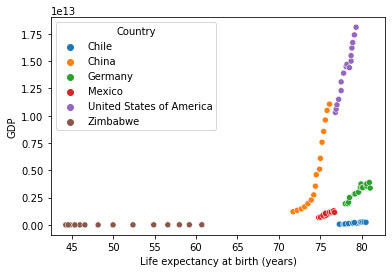

In [24]:
sns.scatterplot(x='LEABY', y='GDP', data =df, hue = 'Country')
plt.xlabel('Life expectancy at birth (years)')

plt.show()

<Figure size 576x432 with 0 Axes>

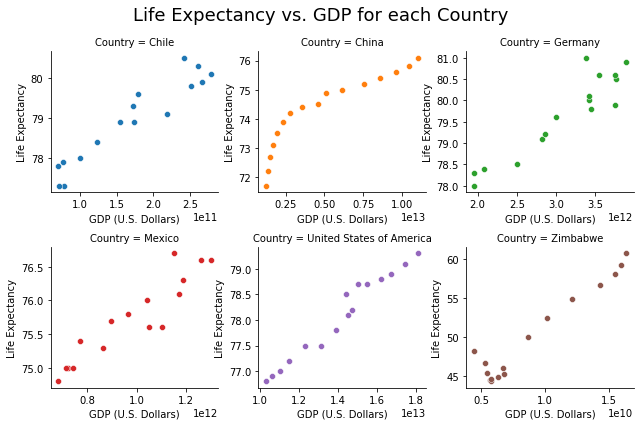

In [19]:
plt.figure(figsize=(8,6))

grid = sns.FacetGrid(data= df, col='Country', hue ='Country', col_wrap=3, sharex = False, sharey = False)
plt.suptitle('Life Expectancy vs. GDP for each Country', fontsize=18)

grid.map(sns.scatterplot, "GDP","LEABY")

grid.set(xlabel = 'GDP (U.S. Dollars)', ylabel = "Life Expectancy")


plt.show()

The correlation coefficient between GDP and Life expectancy is 0.343207 which indicates moderate positive relationship.By looking at the charts we can also see that when GDP increases, life expectancy increases as well.

### Research Question 4: What is the average life expectancy in these nations?

In [125]:
df.groupby('Country').LEABY.mean()

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: LEABY, dtype: float64

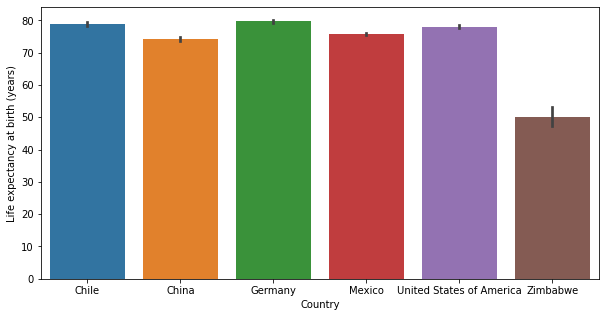

In [141]:
plt.figure(figsize=(10,5))

sns.barplot(data= df, x='Country', y='LEABY')

plt.ylabel("Life expectancy at birth (years)");

plt.show()

We can see that life expectancy of all countries except for Zimbabwe have average values in the range from 75 to 79.The average life expectancy of Zimbabwe is 50.09.Germany has the greatest life expectancy with 79.66 years.

### Research Question 5: What is the distribution of that life expectancy?

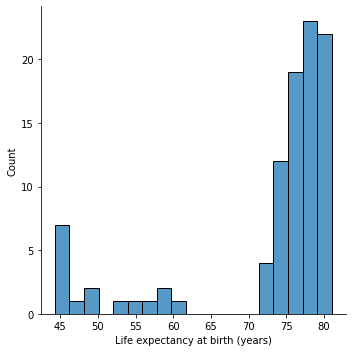

In [12]:
sns.displot(df.LEABY)

plt.xlabel('Life expectancy at birth (years)')

plt.show()

By taking a look at histogram, we can see that life expectancy has a left skewed distribution.Most of the countries have life expectancy between 70 to 80(on the right side of the distribution).Now we can plot violin plot and see the distribution of life expectancy for each country seperately. 

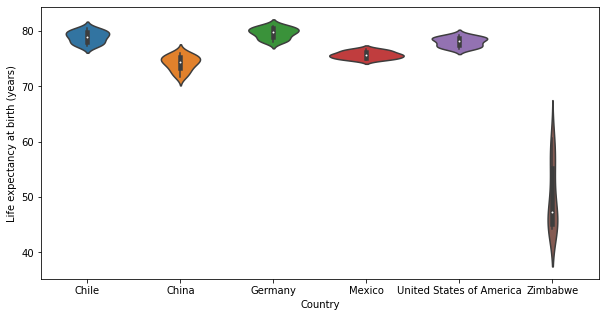

In [17]:
plt.figure(figsize=(10,5))

sns.violinplot(data=df, x='Country', y='LEABY')
plt.ylabel('Life expectancy at birth (years)')

plt.show()

We can see that except for Zimbabwe, life expectancy of all countries are between 70 to 80.

### Research Question 6: What is the distribution of GDP?

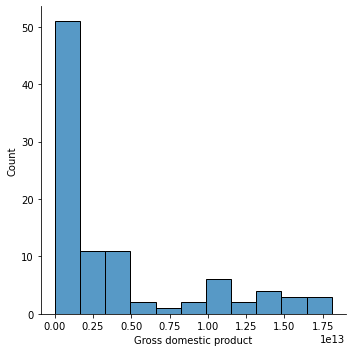

In [27]:
sns.displot(df.GDP)

plt.xlabel('Gross domestic product')

plt.show()

According to GDP histogram, we can see that GDP is highly right skewed which means that GDP of the most of the countries in this dataset are on the left side of the distribution.Now we can plot violin plot and swarm plot on top of it and see the distribution of GDP for each country seperately.

c:\users\ihc\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


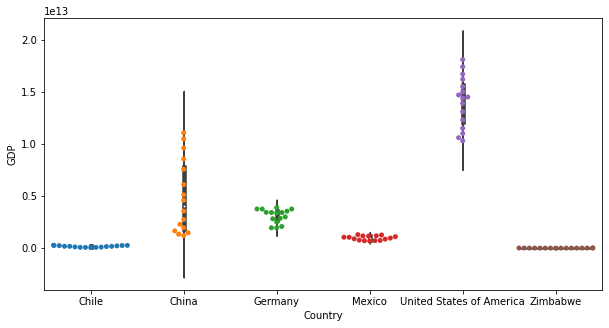

In [37]:
plt.figure(figsize=(10,5))

sns.violinplot(data=df, x='Country', y='GDP')
sns.swarmplot(data=df, x='Country', y='GDP')
plt.ylabel('GDP')

plt.show()

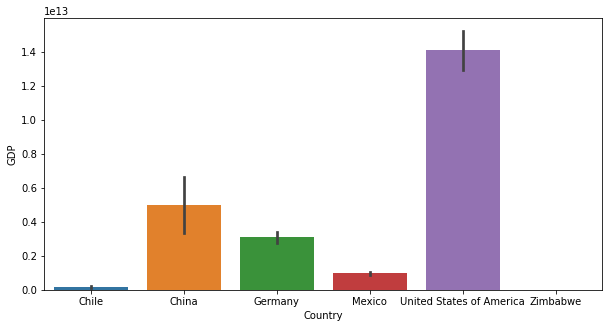

In [39]:
plt.figure(figsize=(10,5))

sns.barplot(data= df, x='Country', y='GDP')

plt.ylabel("GDP");

plt.show()

We can see that USA has the highest GDP.After United States, China is the second in terms of GDP.Zimbabwe has the lowest GDP.

## Conclusions

- Life expectancy has increased over time in these six nations.
- Zimbabwe having the greatest increase.
- Germany has the highest life expectancy throughout this period
- GDP has increased over time in all these six nations.
- china has seen the greatest increase in Gross domestic product between 2000 and 2015.
- There is a moderate positive correlation between GDP and life expectancy for six countries.
- What is the average life expectancy in these nations?
- Life expectancy of all countries except for Zimbabwe have average values in the range from 75 to 79.
- The average life expectancy of Zimbabwe is 50.09
- Germany has the greatest life expectancy with 79.66 years
- The distribution of life expectancy is highly left skewed
- GDP had a right skewed distribution, or most of the observations were on the left side.